In [1160]:
import os
import sys
sys.path.insert(0, os.path.abspath('../utils'))
import Helpers as hp
import qiskit
from qiskit.result import marginal_counts
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import CouplingMap
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import Statevector # to compute state vectors
from qiskit.visualization import array_to_latex
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit_aer import AerSimulator # ideal simulator backend
from qiskit.visualization import plot_histogram  # to plot histograms of simulation results
import numpy as np
from collections import namedtuple
from IPython.display import display, Markdown, Latex
import sympy as sp

# Exercise 1

![Ex1a](res/ex1_a.png)

In [1161]:
def make_qc1():
    qc = QuantumCircuit(1, 1)
    qc.rx(2*np.arccos(0.8),0)
    qc.rz(5*np.pi/6,0)
    return qc

def simulate_measure(qc, n_measure, cBits = [0], labels=['0'], show = False):
    idealSim=AerSimulator()
    result=idealSim.run(qc, shots=n_measure).result()
    count = result.get_counts()
    marginal_count = marginal_counts(count, cBits)
    try:
        show and display(plot_histogram(count))
        show and display(plot_histogram(marginal_counts))
        res = 0
        for label in labels:
            res += marginal_count[label]
        return res
    except:
        return 0

### Layout

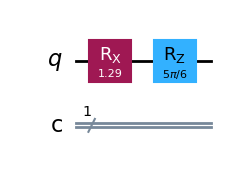

### Unitary Matrix

<IPython.core.display.Latex object>

### Input Statevector

<IPython.core.display.Latex object>

### Output Statevector with global phase

<IPython.core.display.Latex object>

### Output Statevector without global phase

<IPython.core.display.Latex object>

In [1162]:
qc = make_qc1()
hp.display_structure(qc)
stateVecIn = Statevector.from_label('0')
hp.display_state_vector("Input Statevector", stateVecIn, "|0 \\rangle")
stateVecOut = stateVecIn.evolve(qc)
hp.display_state_vector("Output Statevector with global phase", stateVecOut, "[0.8 e^{-\\displaystyle\\frac{5\\Pi}{12}}, 0.6 e^{-\\displaystyle\\frac{\\Pi}{12}}]")

global_phase = np.angle(stateVecOut.data[0])
stateVecOut_no_global_phase = stateVecOut / np.exp(1j * global_phase)  # === stateVecOut * np.exp(-1j * global_phase)
hp.display_state_vector("Output Statevector without global phase", stateVecOut_no_global_phase, "[0.8, 0.6 e^{\\displaystyle\\frac{\\Pi}{3}} ]")

![Ex1b](res/ex1_b.png)

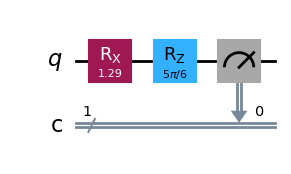

### Expected Alpha: 0.8

### 10 measurements: 8 alpha: 1.0

### 100 measurements: 63 alpha: 0.7937253933193772

### 1000 measurements: 638 alpha: 0.8049844718999243

In [1163]:
qc_z = make_qc1()
qc_z.measure(0,0)
display(qc_z.draw(output='mpl'))
display(Markdown("### Expected Alpha: " +str(0.8)))
display(Markdown("### 10 measurements: " +str(simulate_measure(qc_z, 10)) + " alpha: " +str(np.sqrt(simulate_measure(qc_z, 10)/10))))
display(Markdown("### 100 measurements: " +str(simulate_measure(qc_z, 100)) + " alpha: " +str(np.sqrt(simulate_measure(qc_z, 100)/100))))
display(Markdown("### 1000 measurements: " +str(simulate_measure(qc_z, 1000)) + " alpha: " +str(np.sqrt(simulate_measure(qc_z, 1000)/1000))))


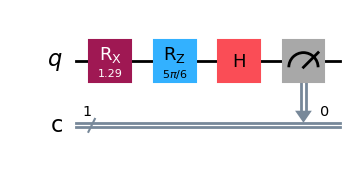

### Expected BetaRe: 0.30000000000000004

### 10 measurements: 6 betaRe: 0.5 betaRe with z extimate: 0.47809144373375745

### 100 measurements: 67 betaRe: 0.3125 betaRe with z extimate: 0.314970394174356

### 1000 measurements: 735 betaRe: 0.2975 betaRe with z extimate: 0.3000900765671102

In [1164]:
qc_x = make_qc1()
qc_x.h(0)
qc_x.measure(0,0)
display(qc_x.draw(output='mpl'))
display(Markdown("### Expected BetaRe: " +str(0.6*np.cos(np.pi/3))))
p0 = simulate_measure(qc_x, 10)/10
t = p0 - (1 - p0)
display(Markdown("### 10 measurements: " +str(simulate_measure(qc_x, 10)) + " betaRe: " +str(t/1.6) + " betaRe with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc_z, 10)/10)))))
p0 = simulate_measure(qc_x, 100)/100
t = p0 - (1 - p0)
display(Markdown("### 100 measurements: " +str(simulate_measure(qc_x, 100)) + " betaRe: " +str(t/1.6) + " betaRe with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc_z, 100)/100)))))
p0 = simulate_measure(qc_x, 1000)/1000
t = p0 - (1 - p0)
display(Markdown("### 1000 measurements: " +str(simulate_measure(qc_x, 1000)) + " betaRe: " +str(t/1.6) + " betaRe with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc_z, 1000)/1000)))))

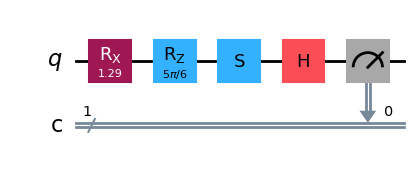

### Expected BetaIm: 0.5196152422706631

### 10 measurements: 0 betaIm: 0.625 betaIm with z extimate: 0.6454972243679028

### 100 measurements: 8 betaIm: 0.525 betaIm with z extimate: 0.5563035899673185

### 1000 measurements: 78 betaIm: 0.52625 betaIm with z extimate: 0.5242063029590693

In [1165]:
qc_y = make_qc1()
qc_y.s(0)
qc_y.h(0)
qc_y.measure(0,0)
display(qc_y.draw(output='mpl'))
display(Markdown("### Expected BetaIm: " +str(0.6*np.sin(np.pi/3))))
p0 = simulate_measure(qc_y, 10)/10
t = (1 - p0) - p0
display(Markdown("### 10 measurements: " +str(simulate_measure(qc_y, 10)) + " betaIm: " +str(t/1.6) + " betaIm with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc_z, 10)/10)))))
p0 = simulate_measure(qc_y, 100)/100
t = (1 - p0) - p0
display(Markdown("### 100 measurements: " +str(simulate_measure(qc_y, 100)) + " betaIm: " +str(t/1.6) + " betaIm with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc_z, 100)/100)))))
p0 = simulate_measure(qc_y, 1000)/1000
t = (1 - p0) - p0
display(Markdown("### 1000 measurements: " +str(simulate_measure(qc_y, 1000)) + " betaIm: " +str(t/1.6) + " betaIm with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc_z, 1000)/1000))))) 

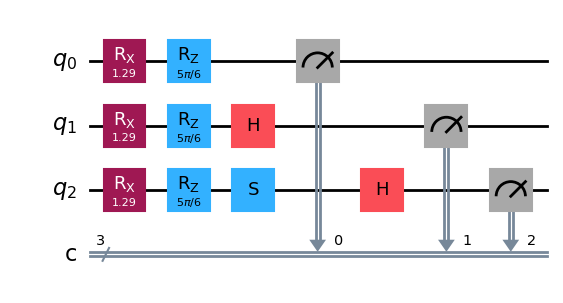

### Expected Alpha: 0.8

### 10 measurements: 7 alpha: 0.8366600265340756

### 100 measurements: 55 alpha: 0.7483314773547883

### 1000 measurements: 658 alpha: 0.8068457101577724

### Expected BetaRe: 0.30000000000000004

### 10 measurements: 6 betaRe: 0.5 betaRe with z extimate: 0.6324555320336759

### 100 measurements: 68 betaRe: 0.3375 betaRe with z extimate: 0.3250418033315769

### 1000 measurements: 737 betaRe: 0.325 betaRe with z extimate: 0.3222425263302931

### Expected BetaIm: 0.5196152422706631

### 10 measurements: 1 betaIm: 0.24999999999999997 betaIm with z extimate: 0.2390457218668787

### 100 measurements: 5 betaIm: 0.525 betaIm with z extimate: 0.5422176684690384

### 1000 measurements: 86 betaIm: 0.52625 betaIm with z extimate: 0.525020920859913

In [1166]:
qc = QuantumCircuit(3, 3)
qc.rx(2*np.arccos(0.8),0)
qc.rz(5*np.pi/6,0)
qc.rx(2*np.arccos(0.8),1)
qc.rz(5*np.pi/6,1)
qc.h(1)
qc.rx(2*np.arccos(0.8),2)
qc.rz(5*np.pi/6,2)
qc.s(2)
qc.h(2)
qc.measure([0, 1, 2], [0, 1, 2])
display(qc.draw(output='mpl'))
display(Markdown("### Expected Alpha: " +str(0.8)))
display(Markdown("### 10 measurements: " +str(simulate_measure(qc, 10)) + " alpha: " +str(np.sqrt(simulate_measure(qc, 10)/10))))
display(Markdown("### 100 measurements: " +str(simulate_measure(qc, 100)) + " alpha: " +str(np.sqrt(simulate_measure(qc, 100)/100))))
display(Markdown("### 1000 measurements: " +str(simulate_measure(qc, 1000)) + " alpha: " +str(np.sqrt(simulate_measure(qc, 1000)/1000))))
display(Markdown("### Expected BetaRe: " +str(0.6*np.cos(np.pi/3))))
p0 = simulate_measure(qc, 10, cBits = [1])/10
t = p0 - (1 - p0)
display(Markdown("### 10 measurements: " +str(simulate_measure(qc, 10, cBits = [1])) + " betaRe: " +str(t/1.6) + " betaRe with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc, 10)/10)))))
p0 = simulate_measure(qc, 100, cBits = [1])/100
t = p0 - (1 - p0)
display(Markdown("### 100 measurements: " +str(simulate_measure(qc, 100, cBits = [1])) + " betaRe: " +str(t/1.6) + " betaRe with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc, 100)/100)))))
p0 = simulate_measure(qc, 1000, cBits = [1])/1000
t = p0 - (1 - p0)
display(Markdown("### 1000 measurements: " +str(simulate_measure(qc, 1000, cBits = [1])) + " betaRe: " +str(t/1.6) + " betaRe with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc, 1000)/1000)))))
display(Markdown("### Expected BetaIm: " +str(0.6*np.sin(np.pi/3))))
p0 = simulate_measure(qc, 10, cBits=[2])/10
t = (1 - p0) - p0
display(Markdown("### 10 measurements: " +str(simulate_measure(qc, 10, cBits=[2])) + " betaIm: " +str(t/1.6) + " betaIm with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc, 10)/10)))))
p0 = simulate_measure(qc, 100, cBits=[2])/100
t = (1 - p0) - p0
display(Markdown("### 100 measurements: " +str(simulate_measure(qc, 100, cBits=[2])) + " betaIm: " +str(t/1.6) + " betaIm with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc, 100)/100)))))
p0 = simulate_measure(qc, 1000, cBits=[2])/1000
t = (1 - p0) - p0
display(Markdown("### 1000 measurements: " +str(simulate_measure(qc, 1000, cBits=[2])) + " betaIm: " +str(t/1.6) + " betaIm with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc, 1000)/1000))))) 




# Exercise 2
![Ex2a](res/ex2_a.png)

In [1167]:
state_00 = Statevector.from_label("00")
state_01 = Statevector.from_label("01")
state_10 = Statevector.from_label("10")
state_11 = Statevector.from_label("11")

phi_plus = (state_00 + state_11) / np.sqrt(2)
phi_minus = (state_00 - state_11) / np.sqrt(2)
psi_plus = (state_01 + state_10) / np.sqrt(2)
psi_minus = (state_01 - state_10) / np.sqrt(2)
IfTestGate = namedtuple('IfTestGate', ['condition', 'gate'])


def make_qc2(bell_state, test_gate1: IfTestGate = IfTestGate(1, lambda qc: qc.x), test_gate2: IfTestGate = IfTestGate(1, lambda qc: qc.z)):
    qc = QuantumCircuit(3, 3)

    amplitude_0 = 0.8
    amplitude_1 = 0.6
    phase = np.pi/3
    qc.initialize([amplitude_0, amplitude_1 * np.exp(1j * phase)], 0)

    qc.initialize(bell_state, [1, 2])

    qc.cx(0,1)
    qc.h(0)
    qc.measure([0, 1], [0, 1])
    with qc.if_test((1, test_gate1.condition)):
        test_gate1.gate(qc)(2)
    with qc.if_test((0, test_gate2.condition)):
        test_gate2.gate(qc)(2)
    

    return qc


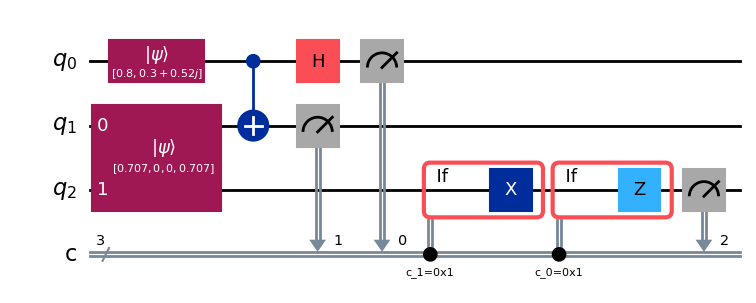

### Expected Alpha: 0.8

### 1000 measurements: 653 alpha: 0.8080841540334769

In [1168]:
qc_z = make_qc2(phi_plus)
qc_z.measure(2, 2)
display(qc_z.draw(output='mpl'))
display(Markdown("### Expected Alpha: " +str(0.8)))
display(Markdown("### 1000 measurements: " +str(simulate_measure(qc_z, 1000, cBits=[2])) + " alpha: " +str(np.sqrt(simulate_measure(qc_z, 1000, cBits=[2])/1000))))


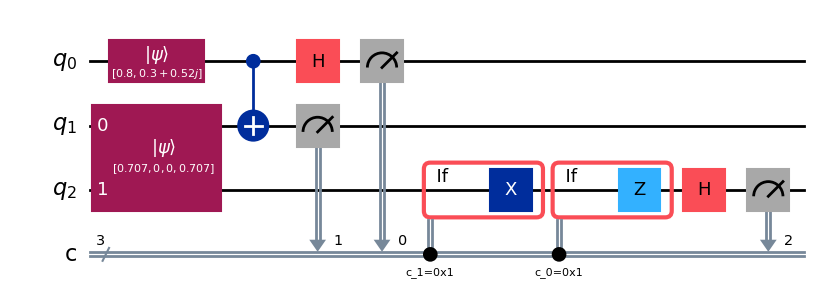

### Expected BetaRe: 0.30000000000000004

### 1000 measurements: 746 betaRe: 0.3025 betaRe with z extimate: 0.3017934984515414

In [1169]:
qc_x = make_qc2(phi_plus)
qc_x.h(2)
qc_x.measure(2, 2)
display(qc_x.draw(output='mpl'))
display(Markdown("### Expected BetaRe: " +str(0.6*np.cos(np.pi/3))))
p0 = simulate_measure(qc_x, 1000, cBits=[2])/1000
t = p0 - (1 - p0)
display(Markdown("### 1000 measurements: " +str(simulate_measure(qc_x, 1000, cBits=[2])) + " betaRe: " +str(t/1.6) + " betaRe with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc_z, 1000, cBits=[2])/1000)))))


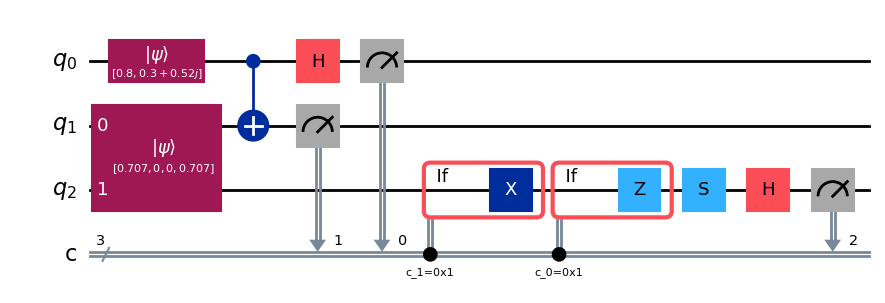

### Expected BetaIm: 0.5196152422706631

### 1000 measurements: 68 betaIm: 0.515 betaIm with z extimate: 0.5141971935882974

In [1170]:
qc_y = make_qc2(phi_plus)
qc_y.s(2)
qc_y.h(2)
qc_y.measure(2, 2)
display(qc_y.draw(output='mpl'))
display(Markdown("### Expected BetaIm: " +str(0.6*np.sin(np.pi/3))))
p0 = simulate_measure(qc_y, 1000, cBits=[2])/1000
t = (1 - p0) - p0
display(Markdown("### 1000 measurements: " +str(simulate_measure(qc_y, 1000, cBits=[2])) + " betaIm: " +str(t/1.6) + " betaIm with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc_z, 1000, cBits=[2])/1000))))) 

![Ex2b](res/ex2_b.png)

### alpha is sqrt(N1/N) instead of sqrt(N0/N) and opposite beta phase

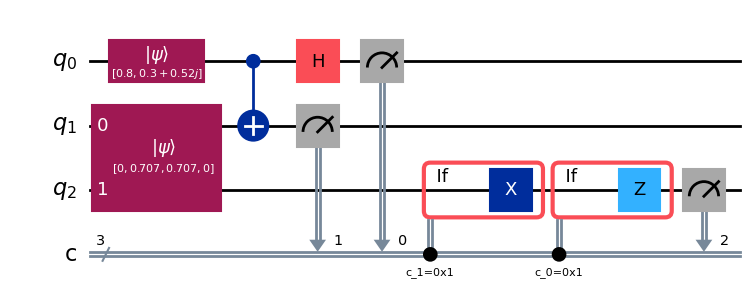

### Expected Alpha: 0.8

### 1000 measurements: 3608 alpha: 0.8067217612039482

In [ ]:
qc_z = make_qc2(psi_plus)
qc_z.measure(2, 2)
display(qc_z.draw(output='mpl'))
display(Markdown("### Expected Alpha: " +str(0.8)))
display(Markdown("### 1000 measurements: " +str(simulate_measure(qc_z, 10000, cBits=[2])) + " alpha: " +str(np.sqrt((10000 - simulate_measure(qc_z, 10000, cBits=[2]))/10000))))
    

    

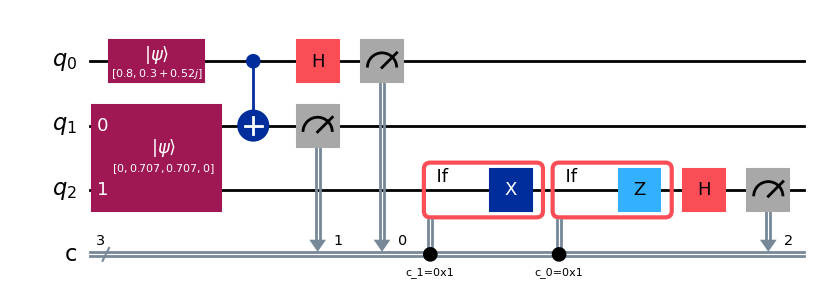

### Expected BetaRe: 0.30000000000000004

### 1000 measurements: 770 betaRe: 0.33125 betaRe with z extimate: 0.42433960758348094

In [1172]:
qc_x = make_qc2(psi_plus)
qc_x.h(2)
qc_x.measure(2, 2)
display(qc_x.draw(output='mpl'))
display(Markdown("### Expected BetaRe: " +str(0.6*np.cos(np.pi/3))))
p0 = simulate_measure(qc_x, 1000, cBits=[2])/1000
t = p0 - (1 - p0)
display(Markdown("### 1000 measurements: " +str(simulate_measure(qc_x, 1000, cBits=[2])) + " betaRe: " +str(t/1.6) + " betaRe with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc_z, 1000, cBits=[2])/1000)))))


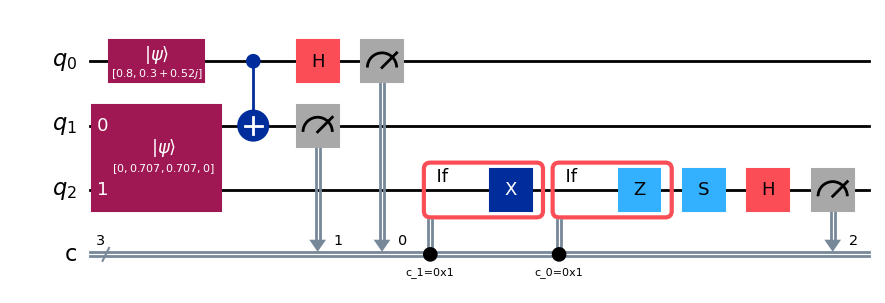

### Expected BetaIm: 0.5196152422706631

### 1000 measurements: 916 betaIm: -0.535 betaIm with z extimate: -0.735095763632817

In [1173]:
qc_y = make_qc2(psi_plus)
qc_y.s(2)
qc_y.h(2)
qc_y.measure(2, 2)
display(qc_y.draw(output='mpl'))
display(Markdown("### Expected BetaIm: " +str(0.6*np.sin(np.pi/3))))
p0 = simulate_measure(qc_y, 1000, cBits=[2])/1000
t = (1 - p0) - p0
display(Markdown("### 1000 measurements: " +str(simulate_measure(qc_y, 1000, cBits=[2])) + " betaIm: " +str(t/1.6) + " betaIm with z extimate: " +str(t/(2*np.sqrt(simulate_measure(qc_z, 1000, cBits=[2])/1000))))) 

![Ex2c](res/ex2_c.png)